Importing `numpy` and `matplotlib`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing `ofnumber` module from `pyorderedfuzzy.ofnumbers`

In [2]:
from pyorderedfuzzy.ofnumbers import ofnumber

`OFNumber` from `np.ndarray()`

In [3]:
f = np.array([1,2,3,4,5])
g = np.array([9,8.5,8,7,6.2])  # len(f) and len(g) must be equal
ofn1 = ofnumber.OFNumber(f,g)
print(ofn1)

branch_f:
	dim: 	5
	domain_x: [ 0.    0.25  0.5   0.75  1.  ]
	fvalue_y: [ 1.  2.  3.  4.  5.]
branch_g:
	dim: 	5
	domain_x: [ 0.    0.25  0.5   0.75  1.  ]
	fvalue_y: [ 9.   8.5  8.   7.   6.2]


Plotting with `matplotlib`

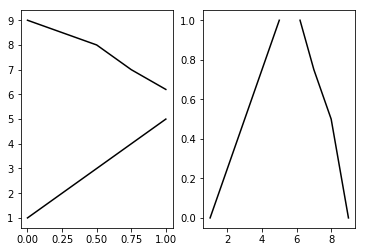

In [4]:
fig = plt.figure('OFNumber')
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))
ofn1.plot_ofn(ax1)
ofn1.plot_ofn(ax2, plot_as='classic')
plt.show()

`Line2D` properties (http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D)

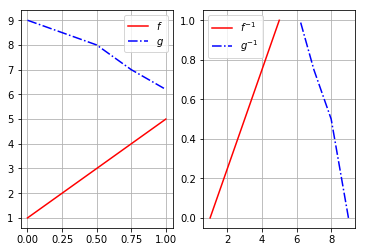

In [5]:
fig = plt.figure('OFNumber')
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))

options_f = {'c':'r', 'ls': '-', 'label': '$f$'}
options_g = {'c':'b', 'ls': '-.', 'label': '$g$'}

ofn1.plot_ofn(ax1, kwargs_f=options_f, kwargs_g=options_g)
options_f['label']='$f^{-1}$'
options_g['label']='$g^{-1}$'
ofn1.plot_ofn(ax2, plot_as='classic', kwargs_f=options_f, kwargs_g=options_g)
ax1.grid(True)
ax1.legend()
ax2.grid(True)
ax2.legend()
plt.show()

Trapezoidal OFN:  $f(x)=ax+b,\ g(x)=cx+d$

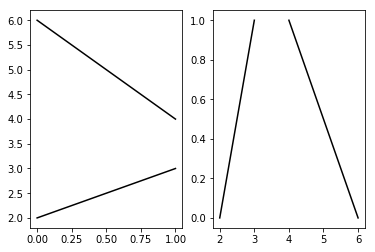

In [6]:
ofn_trap = ofnumber.init_trapezoid_abcd(1,2,-2,6, dim=11)

# plot
fig = plt.figure('OFNumber')
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))
ofn_trap.plot_ofn(ax1)
ofn_trap.plot_ofn(ax2, plot_as='classic')
plt.show()

Trapezoidal OFN:  $f(x)=(f(1)-f(0))\cdot x + f(0),\ g(x) = (g(1) - g(0)) \cdot x + g(0)$

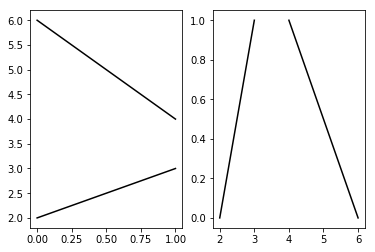

In [7]:
ofn_trap2 = ofnumber.init_trapezoid_x0x1(2,3,6,4, dim=11)

# plot
fig = plt.figure('OFNumber')
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))
ofn_trap2.plot_ofn(ax1)
ofn_trap2.plot_ofn(ax2, plot_as='classic')
plt.show()

Gaussian OFN:  $f(x) = s_f \cdot \sqrt{-2 \cdot \ln(x)} + m_f,\ g(x) = s_g \cdot \sqrt{-2 \cdot \ln(x)} + m_g$

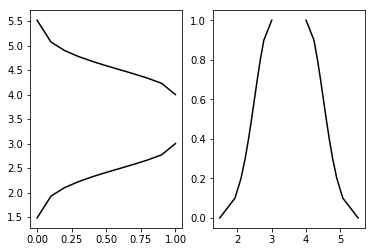

In [8]:
ofn_gauss = ofnumber.init_gaussian(3,-0.5,4,0.5, dim=11)

# plot
fig = plt.figure('OFNumber')
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))
ofn_gauss.plot_ofn(ax1)
ofn_gauss.plot_ofn(ax2, plot_as='classic')
plt.show()

Real number as OFNumber

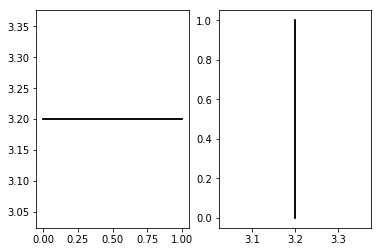

In [9]:
ofn_real = ofnumber.init_from_scalar(3.2, dim=11)

# plot
fig = plt.figure('OFNumber')
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))
ofn_real.plot_ofn(ax1)
ofn_real.plot_ofn(ax2, plot_as='classic')
plt.show()

Defuzzification and orientation of OFN

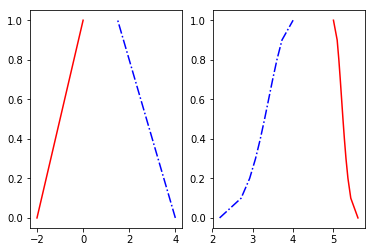

Defuzzy value of A: (CoG):  0.9005 (Expected): 0.875
Defuzzy value of B: (CoG):  4.21145088807 (Expected): 4.24954261889
Orientation of A: 1
Orientation of B: -1


In [10]:
A = ofnumber.init_trapezoid_x0x1(-2,0,4,1.5)
B = ofnumber.init_gaussian(5, 0.2, 4, -0.6)

# plot
options_f = {'c':'r', 'ls': '-'}
options_g = {'c':'b', 'ls': '-.'}
fig = plt.figure('OFNumber')
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))
A.plot_ofn(ax1, plot_as='classic', kwargs_f=options_f, kwargs_g=options_g)
B.plot_ofn(ax2, plot_as='classic', kwargs_f=options_f, kwargs_g=options_g)
plt.show()

print('Defuzzy value of A: (CoG): ', A.defuzzy(), '(Expected):', A.defuzzy(method='expected'))
print('Defuzzy value of B: (CoG): ', B.defuzzy(), '(Expected):', B.defuzzy(method='expected'))
print('Orientation of A:', A.order())
print('Orientation of B:', B.order())

$\alpha$-cut, kernel and support

In [11]:
# A like above

print('A: alphacut=0.3: [{0},{1}]'.format(*A.acut(0.3)))
print('A: kernel: [{0},{1}]'.format(*A.ker()))
print('A: support: [{0},{1}]'.format(*A.supp()))

A: alphacut=0.3: [-1.4000000000000001,3.25]
A: kernel: [0.0,1.5]
A: support: [-2.0,4.0]


Basic arithmetic of OFNumbers

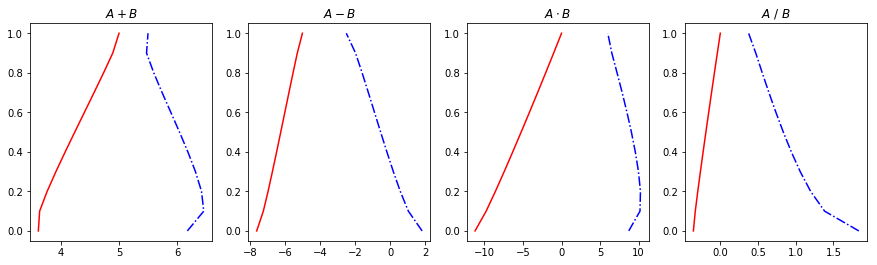

In [12]:
# A, B like above

C1 = A + B
C2 = A - B
C3 = A * B
C4 = A / B

# plot
options_f = {'c':'r', 'ls': '-'}
options_g = {'c':'b', 'ls': '-.'}
fig = plt.figure('OFNumber', figsize=(15,4))
ax1 = plt.subplot2grid((1, 4), (0, 0))
ax2 = plt.subplot2grid((1, 4), (0, 1))
ax3 = plt.subplot2grid((1, 4), (0, 2))
ax4 = plt.subplot2grid((1, 4), (0, 3))
C1.plot_ofn(ax1, plot_as='classic', kwargs_f=options_f, kwargs_g=options_g)
ax1.set_title('$A + B$')
C2.plot_ofn(ax2, plot_as='classic', kwargs_f=options_f, kwargs_g=options_g)
ax2.set_title('$A - B$')
C3.plot_ofn(ax3, plot_as='classic', kwargs_f=options_f, kwargs_g=options_g)
ax3.set_title('$A \cdot B$')
C4.plot_ofn(ax4, plot_as='classic', kwargs_f=options_f, kwargs_g=options_g)
ax4.set_title('$A$ / $B$')
plt.show()

Abs, log, exp, power, max, min

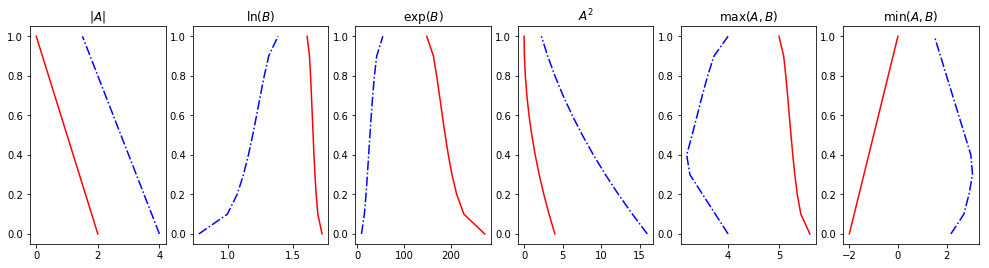

In [13]:
# A, B like above

C1 = ofnumber.fabs(A)
C2 = ofnumber.flog(B)
C3 = ofnumber.fexp(B)
C4 = ofnumber.fpower(A, 2)
C5 = ofnumber.fmax(A, B)
C6 = ofnumber.fmin(A, B)

# plot
options_f = {'c':'r', 'ls': '-'}
options_g = {'c':'b', 'ls': '-.'}
fig = plt.figure('OFNumber', figsize=(17,4))
ax1 = plt.subplot2grid((1, 6), (0, 0))
ax2 = plt.subplot2grid((1, 6), (0, 1))
ax3 = plt.subplot2grid((1, 6), (0, 2))
ax4 = plt.subplot2grid((1, 6), (0, 3))
ax5 = plt.subplot2grid((1, 6), (0, 4))
ax6 = plt.subplot2grid((1, 6), (0, 5))
C1.plot_ofn(ax1, plot_as='classic', kwargs_f=options_f, kwargs_g=options_g)
ax1.set_title('$|A|$')
C2.plot_ofn(ax2, plot_as='classic', kwargs_f=options_f, kwargs_g=options_g)
ax2.set_title('$\ln(B)$')
C3.plot_ofn(ax3, plot_as='classic', kwargs_f=options_f, kwargs_g=options_g)
ax3.set_title('$\exp(B)$')
C4.plot_ofn(ax4, plot_as='classic', kwargs_f=options_f, kwargs_g=options_g)
ax4.set_title('$A^2$')
C5.plot_ofn(ax5, plot_as='classic', kwargs_f=options_f, kwargs_g=options_g)
ax5.set_title('$\max(A,B)$')
C6.plot_ofn(ax6, plot_as='classic', kwargs_f=options_f, kwargs_g=options_g)
ax6.set_title('$\min(A,B)$')
plt.show()

Comparison: ==, !=, <, <=, >, >=

In [14]:
# A, B like above

print(A==B)
print(A!=B)
print(A<B)
print(A>B)

False
True
False
False


Copying

In [15]:
A = ofnumber.init_trapezoid_x0x1(-2,0,4,1.5)
B = A.copy()
print(A==B)
print(A is B)

True
False
